In [1]:
#!pip install networkx==2.5

In [2]:
#!pip install tqdm

In [3]:
from tqdm import tqdm

In [4]:
import sage.all
import numpy as np

In [5]:
import networkx as nx

In [6]:
from sage.graphs.generators.random import RandomChordalGraph

In [7]:
#Generates Chordal Graphs and converts them into networkx object
np.set_printoptions(suppress=True)
def generate_chordal(start, end, step):
    graphs = []
    total=(np.floor(end/step).astype(int))
    properties = []
    avg_degree=0
    avg_density=0
    num_of_nodes=start
    for i in tqdm(range(total)):
        T = RandomChordalGraph(num_of_nodes, algorithm="pruned",
                               f=0.32,s=0.001 
                              )
        ng = T.networkx_graph()
        if (nx.is_connected(ng)):
            #nx.draw(ng)
            graphs.append(ng)
            val = np.array([num_of_nodes, ng.number_of_edges(), average_degree(ng), nx.density(ng)])
            properties.append(val)
            avg_degree+=average_degree(ng)
            avg_density+=nx.density(ng)
            num_of_nodes+=step
    return graphs, properties,avg_degree/len(graphs),avg_density/len(graphs)

In [8]:
def average_degree(G):
    sum_of_degrees=sum(dict(G.degree).values())
    num_of_nodes=G.number_of_nodes()
    avg_degree=sum_of_degrees/num_of_nodes
    return avg_degree

In [10]:
graphs, properties,avg_degree,avg_density = generate_chordal(5, 2000, 5) #start, end, step
print(avg_degree)
print(avg_density)

100%|██████████| 400/400 [12:09<00:00,  1.82s/it]

31.691983569688343
0.06044009689298871


In [11]:
len(graphs)

352

[ 1775.         35977.            40.53746479     0.02285088]


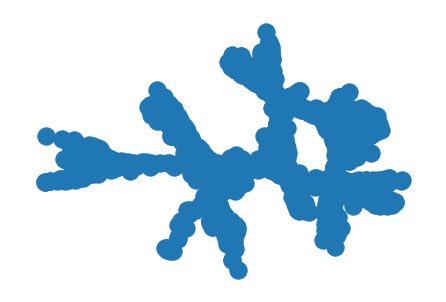

In [19]:
nx.draw(graphs[3])
print(properties[3])

In [13]:
import pickle

In [14]:
with open("chordal_graphs_first_352(step_5)_low_density.pkl", "wb") as fp:
    pickle.dump(graphs, fp)
with open("chordal_graphs_properties_352(step_5)_low_density.pkl", "wb") as fp:
    pickle.dump(properties, fp)

In [16]:
print(graphs[351])

Graph named 'Random Chordal Graph' with 1760 nodes and 40278 edges


In [18]:
graphs, properties,avg_degree,avg_density = generate_chordal(1760, 1000, 5) #start, end, step
print(avg_degree)
print(avg_density)

100%|██████████| 200/200 [29:17<00:00,  8.79s/it]


47.542716040128354
0.022029466412945124


In [20]:
with open("chordal_graphs_last_200(step_5)_low_density.pkl", "wb") as fp:
    pickle.dump(graphs, fp)
with open("chordal_graphs_properties_last_200(step_5)_low_density.pkl", "wb") as fp:
    pickle.dump(properties, fp)

In [13]:
#!pip install netgraph

  Using cached netgraph-4.2.5.tar.gz (77 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 KB 2.6 MB/s eta 0:00:0000:0100:01
  Using cached grandalf-0.7-py3-none-any.whl (41 kB)
  Created wheel for netgraph: filename=netgraph-4.2.5-py3-none-any.whl size=84059 sha256=d6aa8ebe6d0450646599c730b696b80a370c25d0ec57265f808ca34dd232cc39
  Stored in directory: /home/saffat/.cache/pip/wheels/cb/37/33/21e3611307b169ce9e9432d5ce5635192724c5913f6db84be3
Successfully built netgraph
